## How to build a line chart using time series data

In [1]:
import pandas as pd
from pathlib import Path
import os
import numpy

In [2]:
# new visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# read in the data
path2data = Path.joinpath(Path.cwd().parent, 'data', 'ufo.csv')
ufo = pd.read_csv('../data/ufo.csv')
ufo = pd.read_csv(path2data)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [6]:
# check out the time variable
ufo['Time'].describe()

count              80543
unique             68901
top       7/4/2014 22:00
freq                  45
Name: Time, dtype: object

In [7]:
# what data type is this column?
ufo['Time'].dtype

dtype('O')

In [8]:
# convert from string to datetime format
ufo['newtime'] = pd.to_datetime(ufo['Time'])
print(ufo['newtime'].dtype)

datetime64[ns]


In [9]:
# check out the comparison
ufo[['Time', 'newtime']].head(5)

,Time,newtime
0,6/1/1930 22:00,1930-06-01 22:00:00
1,6/30/1930 20:00,1930-06-30 20:00:00
2,2/15/1931 14:00,1931-02-15 14:00:00
3,6/1/1931 13:00,1931-06-01 13:00:00
4,4/18/1933 19:00,1933-04-18 19:00:00


In [10]:
# create some new variables
ufo['Date']=ufo['newtime'].dt.date
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,newtime,Date
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,1930-06-01 22:00:00,1930-06-01
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,1930-06-30 20:00:00,1930-06-30
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,1931-02-15 14:00:00,1931-02-15
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,1931-06-01 13:00:00,1931-06-01
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,1933-04-18 19:00:00,1933-04-18


In [12]:
# create a few more date variables
ufo['Year']=ufo['newtime'].dt.year
ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time,newtime,Date,Year
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,1930-06-01 22:00:00,1930-06-01,1930
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,1930-06-30 20:00:00,1930-06-30,1930


In [18]:
# more
ufo['Month']=ufo['newtime'].dt.month
ufo['Day']=ufo['newtime'].dt.day
ufo['Hour']=ufo['newtime'].dt.hour
ufo['Weekday']=ufo['newtime'].dt.weekday
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,newtime,Date,Year,Month,Day,Hour,Weekday
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,1930-06-01 22:00:00,1930-06-01,1930,6,1,22,6
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,1930-06-30 20:00:00,1930-06-30,1930,6,30,20,0
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,1931-02-15 14:00:00,1931-02-15,1931,2,15,14,6
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,1931-06-01 13:00:00,1931-06-01,1931,6,1,13,0
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,1933-04-18 19:00:00,1933-04-18,1933,4,18,19,1


In [23]:
# this also allows you to do datetime "math"
# what's the extent from the first to the last ufo?
print(ufo['newtime'].max())
print(ufo['newtime'].min())
print('difference:', ufo['Year'].max() - ufo['Year'].min())

2014-09-05 05:30:00
1930-06-01 22:00:00
difference: 84


# create a weekday variable using `.map`

In [25]:
ufo['weekday_name']= ufo['Weekday'].map({0: 'Sunday',
                                         1: 'Monday',
                                         2: 'Tuesday',
                                         3: 'Wednesday',
                                         4: 'Thursday',
                                         5: 'Friday',
                                         6: 'Saturday'
                                        })
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time,newtime,Date,Year,Month,Day,Hour,Weekday,weekday_name
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,1930-06-01 22:00:00,1930-06-01,1930,6,1,22,6,Saturday
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,1930-06-30 20:00:00,1930-06-30,1930,6,30,20,0,Sunday
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,1931-02-15 14:00:00,1931-02-15,1931,2,15,14,6,Saturday


In [51]:
# which dates had the most frequent sightings?
ufo['Date'].value_counts(ascending=False).head(5)

2014-07-04    258
2010-07-04    202
2012-07-04    188
1999-11-16    187
2013-07-04    177
Name: Date, dtype: int64

In [52]:
# to create a linechart, we want a "counter" column
ufo['sightings']=1
ufo.head(4)

,City,Colors Reported,Shape Reported,State,Time,newtime,Date,Year,Month,Day,Hour,Weekday,weekday_name,sightings
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,1930-06-01 22:00:00,1930-06-01,1930,6,1,22,6,Saturday,1
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,1930-06-30 20:00:00,1930-06-30,1930,6,30,20,0,Sunday,1
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,1931-02-15 14:00:00,1931-02-15,1931,2,15,14,6,Saturday,1
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,1931-06-01 13:00:00,1931-06-01,1931,6,1,13,0,Sunday,1


In [59]:
# now add a groupby statement to cluster the data around dates
dates_df = ufo.groupby('Date')['sightings'].sum()
type(dates_df)

pandas.core.series.Series

In [60]:
# now 'drop' the 'sightings' variable it\'s not needed
ufo=ufo.drop('sightings', axis=1)
dates_df.sort_values(ascending=False).head(5)

Date
2014-07-04    258
2010-07-04    202
2012-07-04    188
1999-11-16    187
2013-07-04    177
Name: sightings, dtype: int64

In [61]:
# convert to a dataframe
dates_df = pd.DataFrame(dates_df)
dates_df = dates_df.reset_index()
dates_df.sort_values('sightings', ascending=False).head(5)

,Date,sightings
10496,2014-07-04,258
9035,2010-07-04,202
9766,2012-07-04,188
5168,1999-11-16,187
10131,2013-07-04,177


In [62]:
# Let's merge that back into the original dataframe
ufo2 = pd.merge(ufo, dates_df, on='Date', how='left')
ufo2.sample(5)

,City,Colors Reported,Shape Reported,State,Time,newtime,Date,Year,Month,Day,Hour,Weekday,weekday_name,sightings
3528,Ridgefield,NaN,CIRCLE,WA,6/15/1977 23:00,1977-06-15 23:00:00,1977-06-15,1977,6,15,23,2,Tuesday,21
24486,Crestview,NaN,CYLINDER,FL,2/16/2003 14:33,2003-02-16 14:33:00,2003-02-16,2003,2,16,14,6,Saturday,19
45180,Philadelphia,NaN,TRIANGLE,PA,7/14/2008 22:00,2008-07-14 22:00:00,2008-07-14,2008,7,14,22,0,Sunday,13
34556,Hillsboro,NaN,OTHER,KY,10/29/2005 19:30,2005-10-29 19:30:00,2005-10-29,2005,10,29,19,5,Friday,13
74840,Cape Coral,ORANGE,CIRCLE,FL,12/23/2013 7:00,2013-12-23 07:00:00,2013-12-23,2013,12,23,7,0,Sunday,20


## Create some line charts

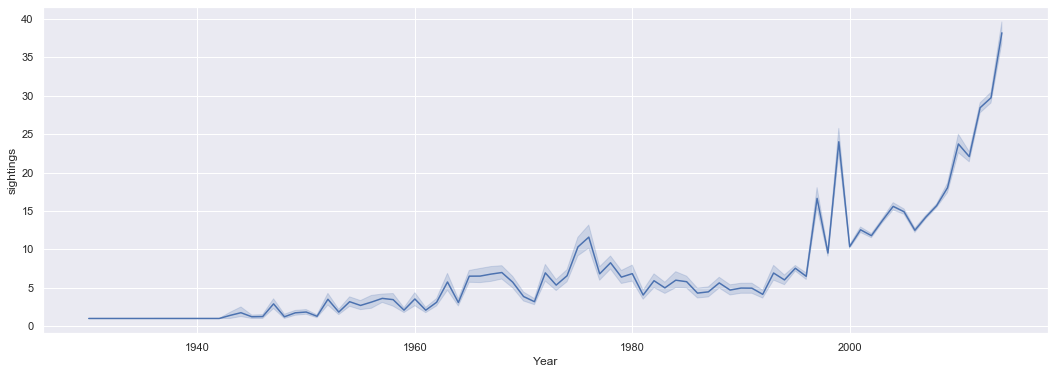

In [65]:
# Trend over years
import seaborn as sns
sns.set(rc={'figure.figsize':(18,6)})
sns.lineplot(x = 'Year', y = 'sightings', data=ufo2);

In [68]:
# clearly Seaborn is displaying the mean per year
ufo2[ufo2['Year']==1999]['sightings'].mean()

24.007209805335258

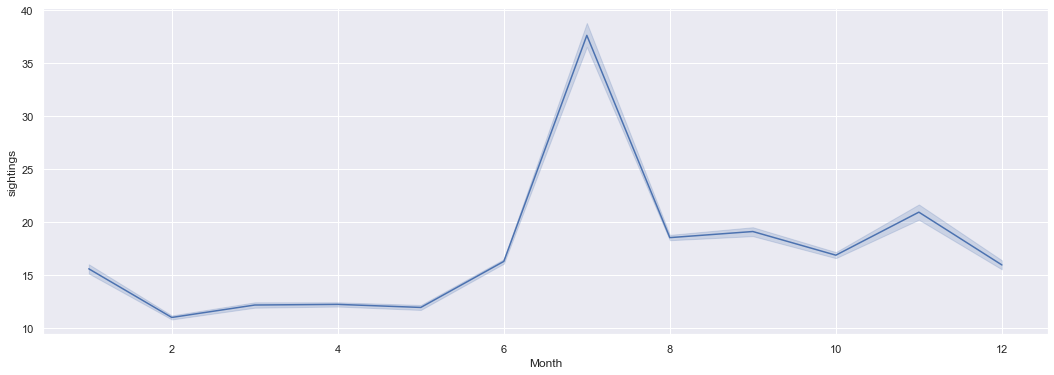

In [70]:
# Trend over months
sns.lineplot(x='Month', y='sightings', data=ufo2);

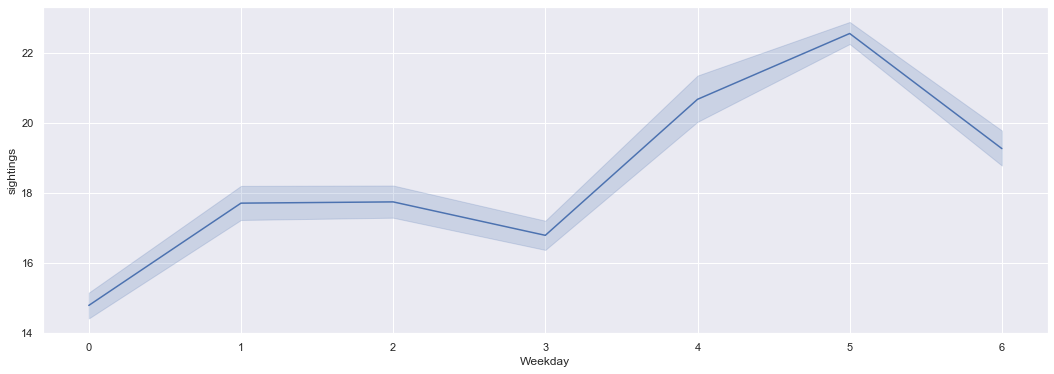

In [71]:
# weekday trend
sns.lineplot(x='Weekday', y='sightings', data=ufo2);

## Multiple lines on same plot

In [72]:
# create some new columns for specific colors
import numpy as np
# np.where
ufo['Colors Reported'].value_counts().head(5)

ORANGE    5216
RED       4809
GREEN     1897
BLUE      1855
YELLOW     842
Name: Colors Reported, dtype: int64

In [73]:
# crate new color variables
ufo['orange']= np.where(ufo['Colors Reported']=='ORANGE', 1, 0)
ufo['red']= np.where(ufo['Colors Reported']=='RED', 1, 0)
ufo['green']= np.where(ufo['Colors Reported']=='GREEN', 1, 0)
ufo['other']= np.where(ufo['orange']+ufo['red']+ufo['green']==0, 1, 0)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,newtime,Date,Year,Month,Day,Hour,Weekday,weekday_name,orange,red,green,other
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,1930-06-01 22:00:00,1930-06-01,1930,6,1,22,6,Saturday,0,0,0,1
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,1930-06-30 20:00:00,1930-06-30,1930,6,30,20,0,Sunday,0,0,0,1
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,1931-02-15 14:00:00,1931-02-15,1931,2,15,14,6,Saturday,0,0,0,1
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,1931-06-01 13:00:00,1931-06-01,1931,6,1,13,0,Sunday,0,0,0,1
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,1933-04-18 19:00:00,1933-04-18,1933,4,18,19,1,Monday,0,0,0,1


In [74]:
# another way to group by color
ufo['color']='other'
ufo.loc[ufo['Colors Reported']=='ORANGE', 'color']='orange'
ufo.loc[ufo['Colors Reported']=='RED', 'color']='red'
ufo.loc[ufo['Colors Reported']=='GREEN', 'color']='green'

In [76]:
# collapse the dataframe on color and data
ufo['sighting']=1
dates = ufo.groupby(['Year', 'color'])['sighting'].sum()
dates.head(3)

Year  color
1930  other    2
1931  other    2
1933  other    1
Name: sighting, dtype: int64

In [77]:
# convert that into a dataframe
colors_df = pd.DataFrame(dates)
colors_df = colors_df.reset_index()

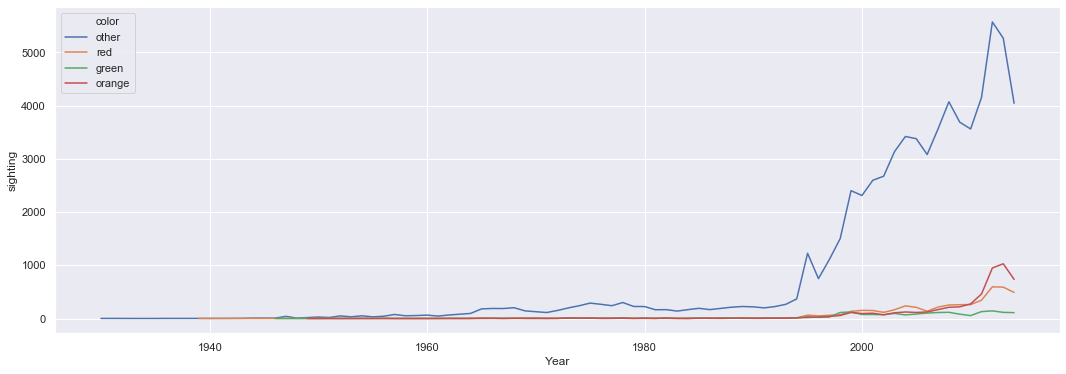

In [78]:
# Plot this as a linechart
sns.lineplot(x='Year', y='sighting', hue='color', data=colors_df);

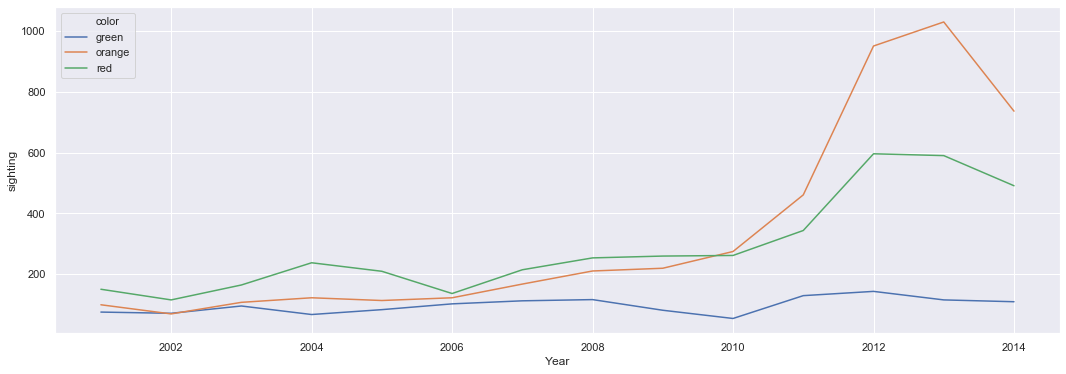

In [79]:
# Let's restrict our window of time
colors2 = colors_df[(colors_df['Year']>2000) & (colors_df['color']!='other')]
sns.lineplot(x='Year', y='sighting', hue='color', data=colors2);